# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import random

np.random.seed(42)

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base url 
base_url = f"http://api.openweathermap.org/data/2.5/weather?APPID={weather_api_key}&units=imperial&q="

In [4]:
data_dic = {
            "City": [],
            "Latitude": [],
            "Longitude": [],
            "Max Temp": [],
            "Humidity": [],
            "Cloudiness": [],
            "Wind Speed": [],
            "Country": []
           }

print('Begining data retrieval')

counter = 1
for city in cities:
    
    try:
        
        
        resp_json = requests.get(base_url + city).json()
        data_dic['City'].append(resp_json['name'])
        data_dic['Latitude'].append(resp_json['coord']['lat'])
        data_dic['Longitude'].append(resp_json['coord']['lon'])
        data_dic['Max Temp'].append(resp_json['main']['temp_max'])
        data_dic['Humidity'].append(resp_json['main']['humidity'])
        data_dic['Cloudiness'].append(resp_json['clouds']['all'])
        data_dic['Wind Speed'].append(resp_json['wind']['speed'])
        data_dic['Country'].append(resp_json['sys']['country'])
        
        print(f"City Name: {city}. ID: {counter}")
        counter +=1
        
    except KeyError:
        print("counldn't get city")
        cities.remove(city)


Begining data retrieval
City Name: henties bay. ID: 1
counldn't get city
City Name: saint-francois. ID: 2
City Name: ushuaia. ID: 3
City Name: mar del plata. ID: 4
City Name: kruisfontein. ID: 5
City Name: bronnoysund. ID: 6
counldn't get city
City Name: albany. ID: 7
City Name: dikson. ID: 8
City Name: ossora. ID: 9
City Name: vaini. ID: 10
City Name: castro. ID: 11
counldn't get city
City Name: san cristobal. ID: 12
City Name: ulladulla. ID: 13
City Name: ewa beach. ID: 14
City Name: bluff. ID: 15
City Name: maldonado. ID: 16
City Name: mataura. ID: 17
City Name: jamestown. ID: 18
City Name: geraldton. ID: 19
City Name: punta arenas. ID: 20
City Name: mitu. ID: 21
City Name: da nang. ID: 22
City Name: bredasdorp. ID: 23
counldn't get city
City Name: busselton. ID: 24
City Name: qaanaaq. ID: 25
City Name: sitka. ID: 26
City Name: rikitea. ID: 27
City Name: yuma. ID: 28
City Name: luanda. ID: 29
City Name: saint-philippe. ID: 30
City Name: atuona. ID: 31
City Name: te anau. ID: 32
City

City Name: marzuq. ID: 267
City Name: luderitz. ID: 268
City Name: clyde river. ID: 269
City Name: metro. ID: 270
City Name: marsa matruh. ID: 271
City Name: pauini. ID: 272
City Name: mount gambier. ID: 273
City Name: emerald. ID: 274
City Name: muisne. ID: 275
City Name: shellbrook. ID: 276
City Name: usinsk. ID: 277
City Name: terney. ID: 278
City Name: ambilobe. ID: 279
City Name: redmond. ID: 280
City Name: arraial do cabo. ID: 281
City Name: west sacramento. ID: 282
City Name: lisala. ID: 283
City Name: bali. ID: 284
City Name: merauke. ID: 285
City Name: yulara. ID: 286
City Name: la rioja. ID: 287
City Name: ndioum. ID: 288
City Name: worcester. ID: 289
City Name: kushtagi. ID: 290
City Name: chifeng. ID: 291
City Name: san alberto. ID: 292
City Name: adeje. ID: 293
City Name: port blair. ID: 294
City Name: saint-joseph. ID: 295
City Name: bahia blanca. ID: 296
City Name: pundaguitan. ID: 297
City Name: toamasina. ID: 298
City Name: iqaluit. ID: 299
City Name: hamilton. ID: 300

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
data_df = pd.DataFrame(data_dic)
print(len(data_df))
data_df.head()

501


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Henties Bay,-22.12,14.28,68.00,27,0,4.32,NA
1,Saint-François,46.42,3.91,68.00,68,18,1.92,FR
2,Ushuaia,-54.80,-68.30,28.40,86,0,4.70,AR
3,Mar del Plata,-38.00,-57.56,50.00,81,90,18.34,AR
4,Kruisfontein,-34.00,24.73,52.32,61,0,5.88,ZA


In [6]:
# save to cvs
data_df.to_csv('WeatherPy.csv',index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
too_humid = data_df.loc[data_df['Humidity'] >100]
print(data_df['Humidity'].max())
len(too_humid)

100


0

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

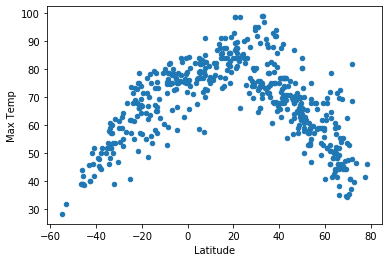

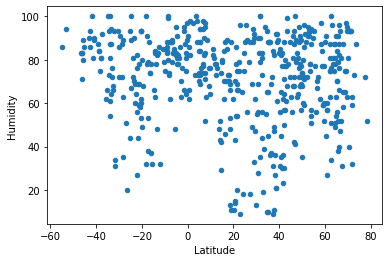

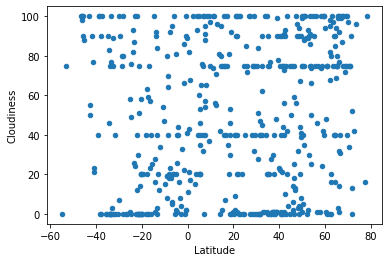

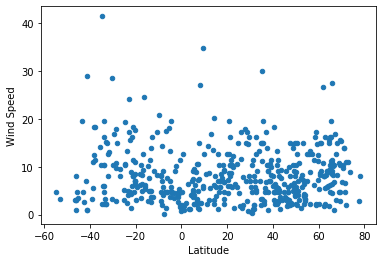

In [11]:
# Mapping function
#Function
def mapping():
    list = ["Max Temp", "Humidity","Cloudiness", "Wind Speed" ]
    for value in list:
        data_df.plot(kind="scatter", x = "Latitude", y = value)
mapping()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = data_df.loc[data_df['Latitude'] >0]
southern_hemi = data_df.loc[data_df['Latitude'] <0]
southern_hemi.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Henties Bay,-22.12,14.28,68.00,27,0,4.32,NA
2,Ushuaia,-54.80,-68.30,28.40,86,0,4.70,AR
3,Mar del Plata,-38.00,-57.56,50.00,81,90,18.34,AR
4,Kruisfontein,-34.00,24.73,52.32,61,0,5.88,ZA
9,Vaini,-21.20,-175.20,75.20,78,75,11.41,TO


In [14]:
def regression():
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, 'r-')
    plt.annotate(line_eq, (0,0.2), xycoords='axes fraction', fontsize = 12, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {r_value**2}")
    plt.show()    
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5368007305548386


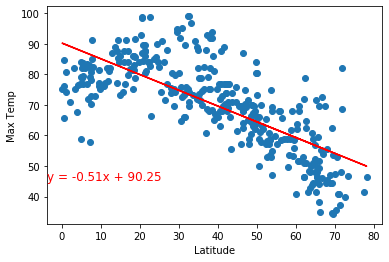

In [15]:
x = northern_hemi['Latitude']
y = northern_hemi['Max Temp']
y_label = "Max Temp"
regression()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7134854730725274


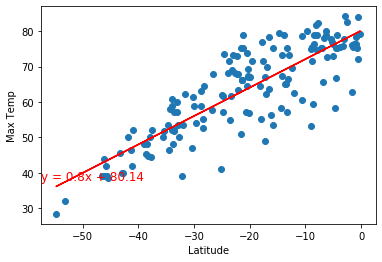

In [16]:
x = southern_hemi['Latitude']
y = southern_hemi['Max Temp']
y_label = "Max Temp"
regression()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 4.859153459837878e-05


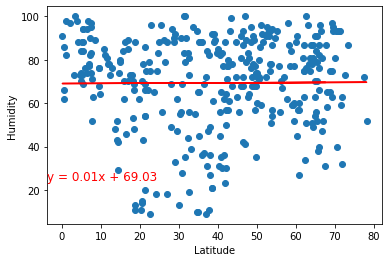

In [17]:
x = northern_hemi['Latitude']
y = northern_hemi['Humidity']
y_label = "Humidity"
regression()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0006415103144195048


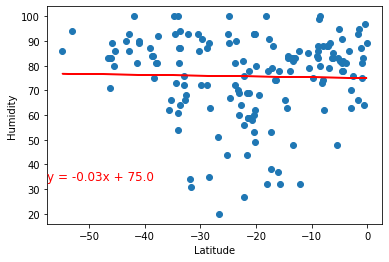

In [18]:
x = southern_hemi['Latitude']
y = southern_hemi['Humidity']
y_label = "Humidity"
regression()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010966093628440062


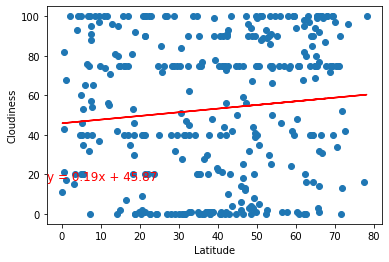

In [19]:
x = northern_hemi['Latitude']
y = northern_hemi['Cloudiness']
y_label = "Cloudiness"

regression()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.051646415189463536


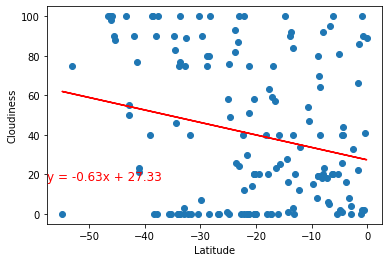

In [20]:
x = southern_hemi['Latitude']
y = southern_hemi['Cloudiness']
y_label = "Cloudiness"
regression()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012898076797258375


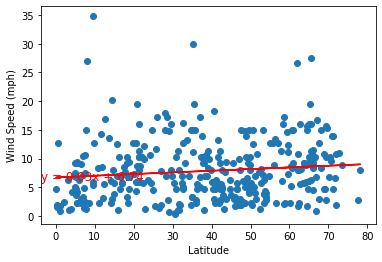

In [21]:
x = northern_hemi['Latitude']
y = northern_hemi['Wind Speed']
y_label = "Wind Speed (mph)"

regression()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.016069980044244658


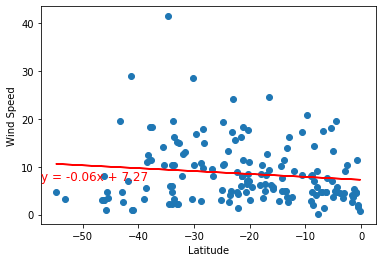

In [22]:
x = southern_hemi['Latitude']
y = southern_hemi['Wind Speed']
y_label = "Wind Speed"
regression()